## 18. 시퀀스 배열로 다루는 순환 신경망(RNN)

### 1. LSTM을 이용한 로이터 뉴스 카테고리 분류

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters  # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눈다
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인
category = np.max(y_train) +1
print(category, '카테고리')
print(len(x_train), '학습용 뉴스 기사')
print(len(x_test), '테스트용 뉴스 기사')
print(x_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
# 단어 수 맞춰주기
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

# 원-핫 인코딩 처리
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델 구조 설정
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델 실행 옵션 정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 조기 중단 선언
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = model.fit(x_train, y_train, batch_size=20, epochs=200, 
                    validation_data=(x_test, y_test), 
                    callbacks=[early_stopping_callback])
# 테스트 정확도 출력
print("\m Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 13s 27ms/step - loss: 2.1455 - accuracy: 0.4432 - val_loss: 1.9125 - val_accuracy: 0.4804
Epoch 2/200
450/450 [==============================] - 12s 27ms/step - loss: 1.7568 - accuracy: 0.5482 - val_loss: 1.7163 - val_accuracy: 0.5748
Epoch 3/200
450/450 [==============================] - 12s 28ms/step - loss: 1.5834 - accuracy: 0.6030 - val_loss: 1.5337 - val_accuracy: 0.6135
Epoch 4/200
450/450 [==============================] - 12s 28ms/step - loss: 1.4233 - accuracy: 0.6368 - val_loss: 1.5206 - val_accuracy: 0.6238
Epoch 5/200
450/450 [==============================] - 12s 27ms/step - loss: 1.3246 - accuracy: 0.6715 - val_loss: 1.4138 - val_accuracy: 0.6438
Epoch 6/200
450/450 [==============================] - 12s 26ms/step - loss: 1.2235 - accuracy: 0.6877 - val_loss: 1.3329 - val_accuracy: 0.6594
Epoch 7/200
450/450 [==============================] - 12s 27ms/step - loss: 1.1344 - accuracy: 0.7106 - val_loss: 1.2807 - val_ac

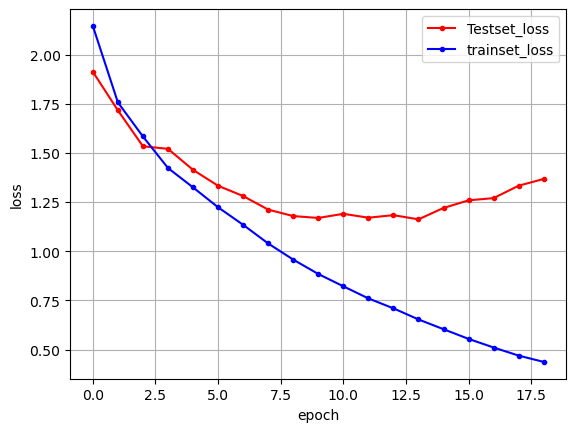

In [8]:
# 학습셋과 테스트셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현하기
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='trainset_loss')

# 그래프에 그리드 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pylab as plt

In [13]:
# 데이터를 불러와 학습셋, 테스트셋으로 나누기
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

17464789/17464789 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 

In [14]:
# 모델의 실행 옵션을 정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 24s 49ms/step - loss: 0.4233 - accuracy: 0.7930 - val_loss: 0.2918 - val_accuracy: 0.8781
Epoch 2/100
469/469 [==============================] - 23s 49ms/step - loss: 0.2390 - accuracy: 0.9076 - val_loss: 0.2919 - val_accuracy: 0.8805
Epoch 3/100
469/469 [==============================] - 22s 48ms/step - loss: 0.1899 - accuracy: 0.9282 - val_loss: 0.2864 - val_accuracy: 0.8760
Epoch 4/100
469/469 [==============================] - 26s 56ms/step - loss: 0.1486 - accuracy: 0.9469 - val_loss: 0.2914 - val_accuracy: 0.8877
Epoch 5/100
469/469 [==============================] - 27s 58ms/step - loss: 0.1221 - accuracy: 0.9566 - val_loss: 0.3003 - val_accuracy: 0.8838
Epoch 6/100
782/782 [==============================] - 9s 12ms/step - loss: 0.3724 - accuracy: 0.8744

 Test Accuracy: 0.8744


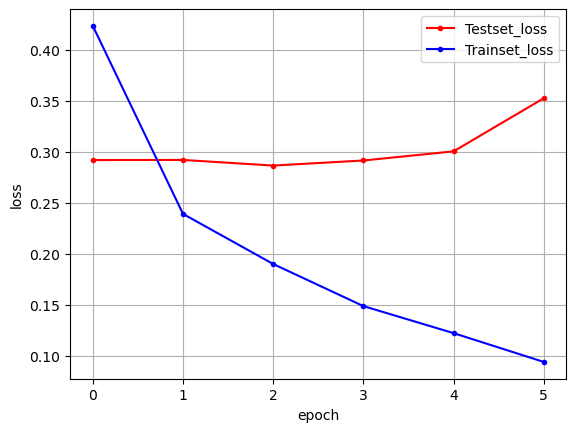

In [15]:
# 학습셋과 테스트셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 3. 어텐션을 사용한 신경망

In [16]:
!pip install attention

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나누기
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수 맞춰주기
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조 설정
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델의 실행 옵션을 정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100,  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
625/625 [==============================] - 384s 613ms/step - loss: 0.3784 - accuracy: 0.8226 - val_loss: 0.2944 - val_accuracy: 0.8816
Epoch 2/100
625/625 [==============================] - 391s 625ms/step - loss: 0.2249 - accuracy: 0.9117 - val_loss: 0.3019 - val_accuracy: 0.8850
Epoch 3/100
625/625 [==============================] - 384s 615ms/step - loss: 0.1614 - accuracy: 0.9369 - val_loss: 0.2927 - val_accuracy: 0.8884
Epoch 4/100
625/625 [==============================] - 390s 624ms/step - loss: 0.1177 - accuracy: 0.9553 - val_loss: 0.3733 - val_accuracy: 0.8752
Epoch 5/100
625/625 [==============================] - 389s 623ms/step - loss: 0.0807 - accuracy: 0.9690 - val_loss: 0.3901 - val_accuracy: 0.8811
Epoch 6/100
782/782 [==============================] - 184s 235ms/step - loss: 0.5238 - accuracy: 0.8729

 Test Accuracy: 0.8729


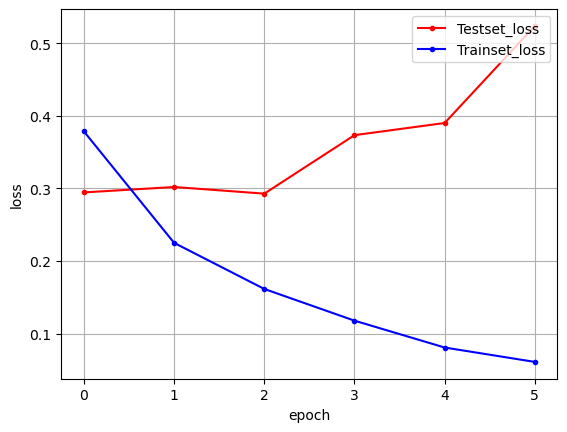

In [2]:
# 학습셋과 테스트셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()